In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [70]:
df = pd.read_csv('CSVs/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [71]:
df.head()

,S4248SM144NCEN
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [72]:
df.columns = ['Sales']


<Axes: xlabel='DATE'>

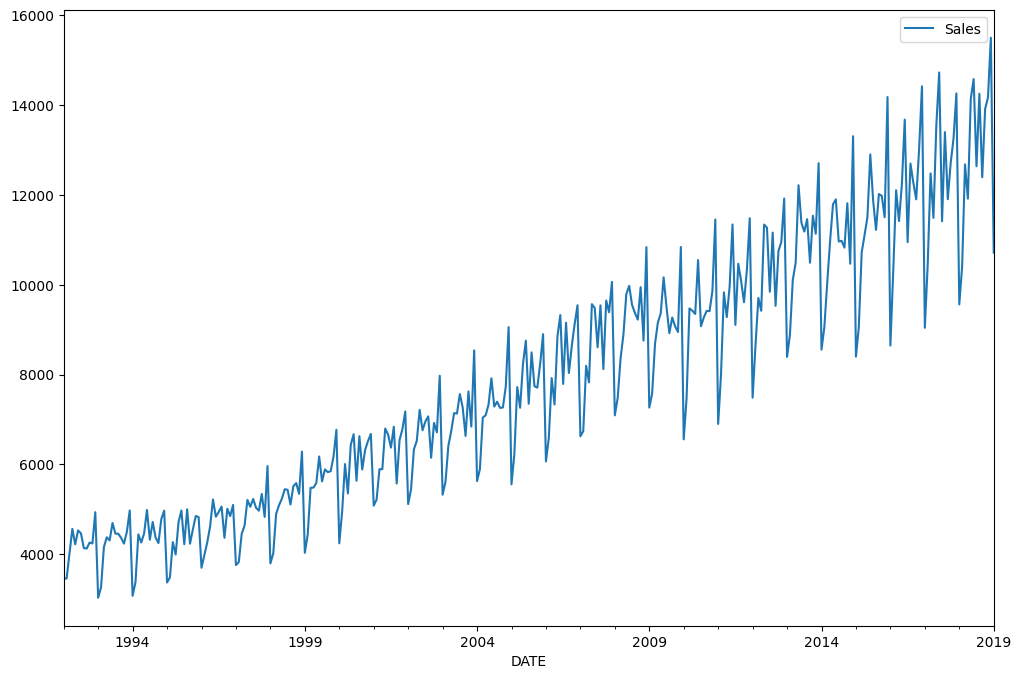

In [73]:
#df.head()
df.plot(figsize=(12,8))

In [74]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [75]:
results = seasonal_decompose(df['Sales'])

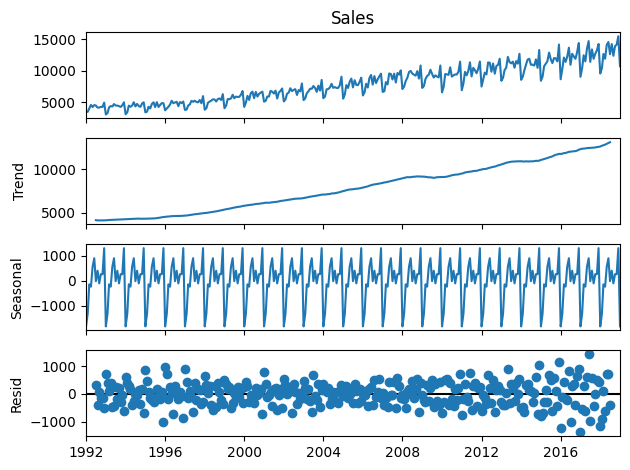

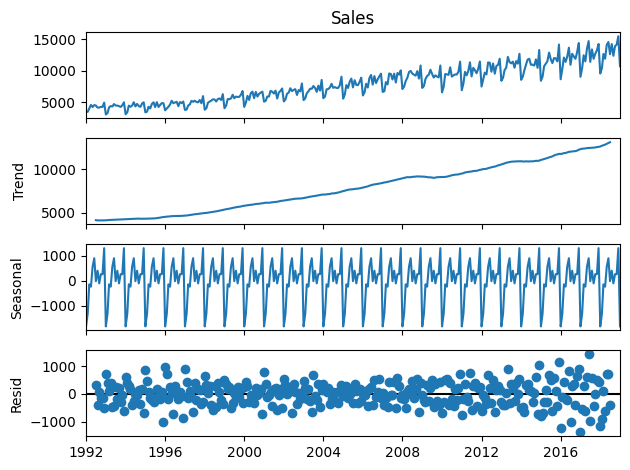

In [76]:
results.plot()

In [77]:
len(df)

325

In [78]:
df.head()

,Sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [79]:
325-12

313

In [80]:
train = df.iloc[:313]
test = df.iloc[313:]

In [81]:
ser = np.array([23,56,2,13,14])

In [82]:
ser.max()

56

In [83]:
ser / ser.max() # we are doing this so that all the values are between 0 and 1

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

In [84]:
from sklearn.preprocessing import MinMaxScaler

In [85]:
scaler = MinMaxScaler()

In [86]:
scaler.fit(train) # finds the max value in train data

MinMaxScaler()

In [87]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [88]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


In [89]:
scaled_test # technically we scale data so that the values can be between 0 and 1

array([[0.63116506],
       [0.82502778],
       [0.75972305],
       [0.94939738],
       [0.98743482],
       [0.82135225],
       [0.95956919],
       [0.80049577],
       [0.93025045],
       [0.95247457],
       [1.0661595 ],
       [0.65706471]])

In [90]:
n_input = 2 # we put n_input 2 so that we can predict the next value
n_features = 1 # we have 1 feature which is sales
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [91]:
len(scaled_train)

313

In [92]:
len(generator) # which will be 313- n_input i.e. 313-2 = 311

311

In [93]:
X,y = generator[0] # what generator basically does is that it takes the first 2 values and predicts the 3rd value and then it takes the 2nd and 3rd value and predicts the 4th value and so on

In [94]:
X

array([[[0.03658432],
        [0.03649885]]])

In [95]:
y

array([[0.08299855]])

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [97]:
n_input = 12 # we put n_input 12 so that we can predict the next value
n_features = 1 # we have 1 feature which is sales
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [98]:
model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [99]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 91,351 (356.84 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

In [100]:
model.fit(train_generator,epochs=25)

Epoch 1/25


301/301 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0223
Epoch 2/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0119
Epoch 3/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0092
Epoch 4/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0076
Epoch 5/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0098
Epoch 6/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0055
Epoch 7/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0047
Epoch 8/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0032
Epoch 9/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0030
Epoch 10/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0024
Epoch 11/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0025
Epoch 12/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0021
Epoch 13/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0018
Epoch 14/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015
Epoch 15/25
301/301 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0015


In [101]:
model.history.history.keys()

dict_keys(['loss'])

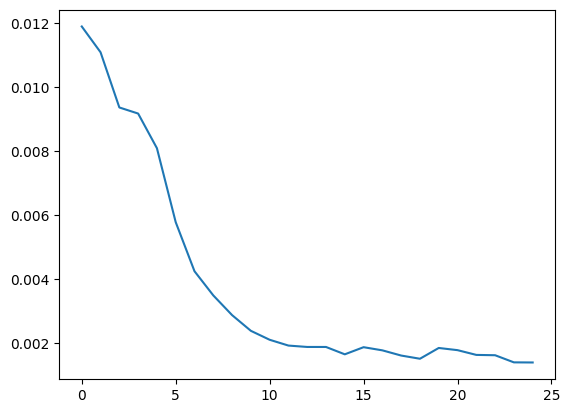

In [102]:
myloss = model.history.history['loss']
plt.plot(range(len  (myloss)),myloss)

In [103]:
# 12 history steps and predict step 13
# last 12 points of points train --> pt 1 of test data

In [104]:
first_eval_batch = scaled_train[-12:]

In [105]:
first_eval_batch

array([[0.63432772],
       [0.80776135],
       [0.72313873],
       [0.89870929],
       [1.        ],
       [0.71672793],
       [0.88648602],
       [0.75869732],
       [0.82742115],
       [0.87443371],
       [0.96025301],
       [0.5584238 ]])

In [106]:
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))

In [107]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


array([[0.7017068]], dtype=float32)

# Forecast using RNN model

In [108]:
test_pred = [] # we will store the predictions in this list


# last n_input points of training data
first_eval_batch = scaled_train[-n_input:] # generalised version of line first_eval_batch = scaled_train[-12:]
# reshaping this ti the format RNN wants (same format as TIMESERIESGENERATOR)
current_batch = first_eval_batch.reshape((1, n_input, n_features))


# loop for predictions
# how far  into future we want to predict
# len(test)
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_pred.append(current_pred) 
    # update the current batch to include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1) # this line meant that we are appending the current prediction to the current batch and then we are dropping the first value of the current batch and then we are appending the current prediction to the current batch and then we are dropping the first value of the current batch and so on
    
    #current_batch[:,1:,:],[[current_pred]] meant that we are appending the current prediction to the current batch and then we are dropping the first value of the current batch so that we can predict the next value
    


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


In [109]:
true_predictions = scaler.inverse_transform(test_pred)

In [110]:
true_predictions

array([[11240.26816541],
       [12746.69532675],
       [12107.13847005],
       [13930.98539263],
       [14908.08163273],
       [12034.75929207],
       [13804.34954941],
       [12224.90168053],
       [13117.65282172],
       [13536.5876627 ],
       [14505.28962797],
       [10179.79818583]])

In [111]:
test ['Predictions'] = true_predictions

In [112]:
test

,Sales,Predictions
DATE,,
2018-02-01,10415,11240.268165
2018-03-01,12683,12746.695327
2018-04-01,11919,12107.138470
2018-05-01,14138,13930.985393
2018-06-01,14583,14908.081633
2018-07-01,12640,12034.759292
2018-08-01,14257,13804.349549
2018-09-01,12396,12224.901681
2018-10-01,13914,13117.652822


<Axes: xlabel='DATE'>

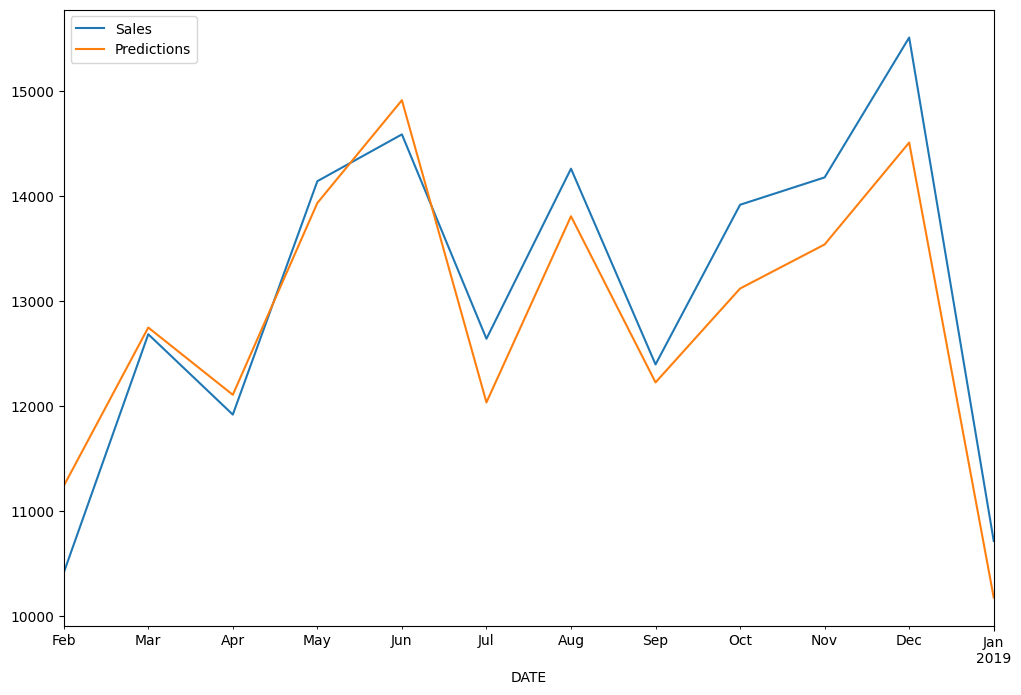

In [113]:
test.plot(figsize=(12,8))

In [118]:
model.save('my_rnn_model.keras')


In [119]:
# loading this model 
from tensorflow.keras.models import load_model


In [120]:
new_model = load_model('my_rnn_model.keras')

In [121]:
new_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           151 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,704 (713.69 KB)

 Trainable params: 91,351 (356.84 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 91,353 (356.85 KB)